In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

df1= pd.read_excel('PSP_Jan_Feb_2019.xlsx')
drop_list=[]

for i in range(len(df1)-1):
    if df1.loc[i,'country']==df1.loc[i+1,'country'] and df1.loc[i,'amount']==df1.loc[i+1,'amount']:
        dt1 = df1.loc[i,'tmsp']
        dt2 = df1.loc[i+1,'tmsp']
        delta=dt2-dt1
        if delta.seconds<=60:
            drop_list.append(i)  

In [2]:
raw_dataset = df1.drop(df1.index[drop_list])
raw_dataset.shape[0]

27337

In [3]:
prepros_dataset=pd.DataFrame()
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,2]=='Germany':
        prepros_dataset.loc[i,'Is_Germany']=1
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Austria':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=1
        prepros_dataset.loc[i,'Is_Switzerland']=0
    elif raw_dataset.iloc[i,2]=='Switzerland':
        prepros_dataset.loc[i,'Is_Germany']=0
        prepros_dataset.loc[i,'Is_Austria']=0
        prepros_dataset.loc[i,'Is_Switzerland']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,1.0,0.0,0.0


In [4]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,5]=='UK_Card':
        prepros_dataset.loc[i,'Is_UK_Card']=1
        prepros_dataset.loc[i,'Is_Simplecard']=0
        prepros_dataset.loc[i,'Is_Moneycard']=0
        prepros_dataset.loc[i,'Is_Goldcard']=0
    elif raw_dataset.iloc[i,5]=='Simplecard':
        prepros_dataset.loc[i,'Is_UK_Card']=0
        prepros_dataset.loc[i,'Is_Simplecard']=1
        prepros_dataset.loc[i,'Is_Moneycard']=0
        prepros_dataset.loc[i,'Is_Goldcard']=0
    elif raw_dataset.iloc[i,5]=='Moneycard':
        prepros_dataset.loc[i,'Is_UK_Card']=0
        prepros_dataset.loc[i,'Is_Simplecard']=0
        prepros_dataset.loc[i,'Is_Moneycard']=1
        prepros_dataset.loc[i,'Is_Goldcard']=0
    elif raw_dataset.iloc[i,5]=='Goldcard':
        prepros_dataset.loc[i,'Is_UK_Card']=0
        prepros_dataset.loc[i,'Is_Simplecard']=0
        prepros_dataset.loc[i,'Is_Moneycard']=0
        prepros_dataset.loc[i,'Is_Goldcard']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,7]=='Visa':
        prepros_dataset.loc[i,'Is_Visa']=1
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Diners':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=1
        prepros_dataset.loc[i,'Is_Master']=0
    elif raw_dataset.iloc[i,7]=='Master':
        prepros_dataset.loc[i,'Is_Visa']=0
        prepros_dataset.loc[i,'Is_Diners']=0
        prepros_dataset.loc[i,'Is_Master']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
raw_dataset['amount'].describe(percentiles=[.05,.95])

count    27337.000000
mean       201.878370
std         96.144551
min          6.000000
5%          43.000000
50%        200.000000
95%        366.000000
max        630.000000
Name: amount, dtype: float64

In [8]:
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,3]<100:
        prepros_dataset.loc[i,'amount0']=1
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=0
    elif 100<= raw_dataset.iloc[i,3] <=300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=1
        prepros_dataset.loc[i,'amount2']=0
    elif raw_dataset.iloc[i,3] >300:
        prepros_dataset.loc[i,'amount0']=0
        prepros_dataset.loc[i,'amount1']=0
        prepros_dataset.loc[i,'amount2']=1
        
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [9]:
df=raw_dataset
df['month']=raw_dataset['tmsp'].dt.month
for i in range(len(raw_dataset)):
    if  raw_dataset.iloc[i,8]==1:
        prepros_dataset.loc[i,'Is_Jan']=1
        prepros_dataset.loc[i,'Is_Feb']=0
    elif  raw_dataset.iloc[i,8]==2:
        prepros_dataset.loc[i,'Is_Jan']=0
        prepros_dataset.loc[i,'Is_Feb']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,amount0,amount1,amount2,Is_Jan,Is_Feb
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [57]:
df['day']=raw_dataset['tmsp'].dt.day

In [11]:
raw_dataset['amount'].describe(percentiles=[.05,.95])

count    27337.000000
mean       201.878370
std         96.144551
min          6.000000
5%          43.000000
50%        200.000000
95%        366.000000
max        630.000000
Name: amount, dtype: float64

In [17]:
raw_dataset=raw_dataset.reset_index()
raw_dataset.head(30)

,index,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card,month
0,1,1,2019-01-01 00:01:17,Germany,89,1,UK_Card,0,Visa,1
1,3,3,2019-01-01 00:03:13,Germany,238,1,UK_Card,1,Diners,1
2,4,4,2019-01-01 00:04:33,Austria,124,0,Simplecard,0,Diners,1
3,6,6,2019-01-01 00:07:19,Switzerland,282,0,Simplecard,0,Master,1
4,7,7,2019-01-01 00:08:46,Germany,117,1,UK_Card,0,Master,1
5,9,9,2019-01-01 00:10:49,Switzerland,174,0,Simplecard,0,Visa,1
6,14,14,2019-01-01 00:14:35,Austria,232,1,UK_Card,1,Diners,1
7,15,15,2019-01-01 00:15:45,Germany,268,0,Simplecard,0,Master,1
8,18,18,2019-01-01 00:18:37,Switzerland,89,0,Moneycard,0,Master,1
9,21,21,2019-01-01 00:21:11,Germany,205,1,Moneycard,0,Master,1


In [18]:
for i in range(len(raw_dataset)):
    weekday=datetime.weekday(raw_dataset.at[i,'tmsp'])
    if  weekday==0:
        prepros_dataset.loc[i,'Monday']=1
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==1:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=1
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==2:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=1
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==3:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=1
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==4:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=1
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==5:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=1
        prepros_dataset.loc[i,'Sunday']=0
    elif weekday==6:
        prepros_dataset.loc[i,'Monday']=0
        prepros_dataset.loc[i,'Tuesday']=0
        prepros_dataset.loc[i,'Wednesday']=0
        prepros_dataset.loc[i,'Thursday']=0
        prepros_dataset.loc[i,'Friday']=0
        prepros_dataset.loc[i,'Saturday']=0
        prepros_dataset.loc[i,'Sunday']=1

prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,...,amount2,Is_Jan,Is_Feb,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [21]:
df['hour']=raw_dataset['tmsp'].dt.hour
df.tail()

,Unnamed: 0,tmsp,country,amount,success,PSP,3D_secured,card,month,hour
50405,50405,2019-02-28 23:45:39,Switzerland,415,0,UK_Card,0,Visa,2,23
50406,50406,2019-02-28 23:46:48,Austria,91,0,UK_Card,0,Master,2,23
50407,50407,2019-02-28 23:47:04,Austria,91,0,UK_Card,0,Master,2,23
50408,50408,2019-02-28 23:47:36,Austria,91,0,UK_Card,0,Master,2,23
50409,50409,2019-02-28 23:48:19,Austria,91,1,Moneycard,0,Master,2,23


In [19]:
for i in range(len(raw_dataset)):
    hour=raw_dataset.iloc[i]['tmsp'].hour
    for j in range (24):
        if j==hour:
            prepros_dataset.loc[i,'hour'+ str(j)]=1
        else:
            prepros_dataset.loc[i,'hour'+ str(j)]=0
            
prepros_dataset.tail(50)

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,...,hour14,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23
27287,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27288,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27289,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27290,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27291,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27292,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27293,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27294,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27295,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27296,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
for i in range(len(raw_dataset)):
    prepros_dataset.loc[i,'3D_secured']=raw_dataset.loc[i,'3D_secured']
prepros_dataset.head()

,Is_Germany,Is_Austria,Is_Switzerland,Is_UK_Card,Is_Simplecard,Is_Moneycard,Is_Goldcard,Is_Visa,Is_Diners,Is_Master,...,hour15,hour16,hour17,hour18,hour19,hour20,hour21,hour22,hour23,3D_secured
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
prepros_dataset.to_csv('preprocessed')

<BarContainer object of 4 artists>

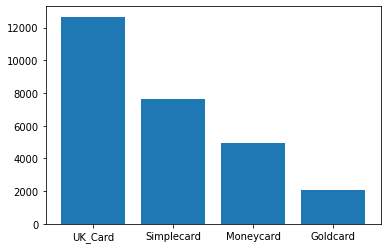

In [3]:
import matplotlib.pyplot as plt
names=['UK_Card','Simplecard','Moneycard','Goldcard']
values=[(raw_dataset.PSP=='UK_Card').sum(),(raw_dataset.PSP=='Simplecard').sum(),(raw_dataset.PSP=='Moneycard').sum()
        ,(raw_dataset.PSP=='Goldcard').sum()]
plt.bar(names,values)

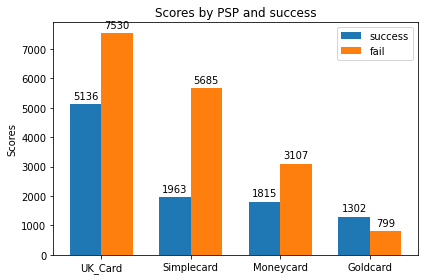

In [7]:
[su,ss,sm,sg]=[0,0,0,0]
[fu,fs,fm,fg]=[0,0,0,0]
for i in range(len(raw_dataset)):
    if raw_dataset.iloc[i,5]=='UK_Card':
        if raw_dataset.iloc[i,4]==1:
            su +=1
        else:
            fu +=1
    elif raw_dataset.iloc[i,5]=='Simplecard':
        if raw_dataset.iloc[i,4]==1:
            ss +=1
        else:
            fs +=1
    elif raw_dataset.iloc[i,5]=='Moneycard':
        if raw_dataset.iloc[i,4]==1:
            sm +=1
        else:
            fm +=1
    elif raw_dataset.iloc[i,5]=='Goldcard':
        if raw_dataset.iloc[i,4]==1:
            sg +=1
        else:
            fg +=1
        
labels = ['UK_Card', 'Simplecard', 'Moneycard', 'Goldcard']
successful = [su,ss,sm,sg]
failed = [fu,fs,fm,fg]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, successful, width, label='success')
rects2 = ax.bar(x + width/2, failed, width, label='fail')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by PSP and success')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()